###Information Theory

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.mlab as mlab
import math
import scipy.stats
%matplotlib inline

<b>Machine learning</b> is concerned with building models out of data and making predictions. 
<b>Information theory </b> is concerned with representing data in a way that is compact and robust to errors. So what's the link between the two?

In order to represent data compactly, we need to assign short words to highly probable strings and longer words to less probable strings. This requires a good probability model of the data.

###1. Entropy

Entropy of a random variable X tells us the average amount of information needed to send X
through a channel.

For discrete variables $ H[x] = - \sum_{x}p(x)\ log_2p(x) $. If we use the base 2 logarithm, it gives us the average number of <b>bits</b> needed to specify X. Alternatively, we can use the natural logarithm, in which case the units of information are called <b>nats</b>: $ H[x] = - \sum_{x}p(x)\ log(x) $

Consider 3 discrete random variables X, Y, Z that have 100 possible values in the interval [-3, 3].
X is normally distributed with mean 0 and variance 1, Y is normally distributed with mean 0 and variance 0.3,
Z is normally distributed with mean 0 and variance 0.1

We plot the probability functions P(X), P(Y) and P(Z).

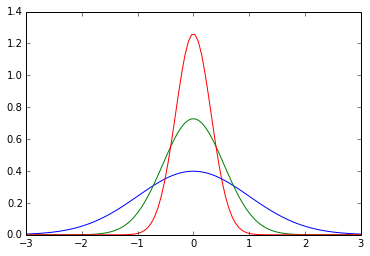

In [2]:
mean = 0
variance_X = 1
variance_Y = 0.3
variance_Z = 0.1
x = np.linspace(-3, 3, 100)
y1 = mlab.normpdf(x, mean, math.sqrt(variance_X))
y2 = mlab.normpdf(x, mean, math.sqrt(variance_Y))
y3 = mlab.normpdf(x, mean, math.sqrt(variance_Z))
plt.plot(x, y1, 'blue')
plt.plot(x, y2, 'green')
plt.plot(x, y3, 'red')
plt.show()

In [5]:
print(scipy.stats.entropy(y1))
print(scipy.stats.entropy(y2))
print(scipy.stats.entropy(y3))

4.20758108034
3.62031198994
3.07100636761


The more sharply-peaked a distribution is, the lower its entropy is. The red distribution has fewer values with higher probability compared to the blue one, so intuitively, we need less average info to encode the values.

The distributions that maximize the entropy are:
 - the uniform distribution (for <b>discrete</b> variables)
 - the Gaussian distribution (for <b>continuous</b> variables)

###2. Differential entropy, conditional entropy

For continuous variables, the extended concept of entropy is called differential entropy:

$ H[x] = - \int p(x)\ log\ p(x) dx $

Suppose we have a joint probability p(X, Y), which we use to sample values from X and Y. If a value x of X is already known, then we need an additional $ -log\ p(Y|X = x) $ nats to specify Y. This means that on average, we need:

$ H[Y|X] = - \int\int p(X, Y)\ log\ p(Y|X)\ dy dx $

nats to specify Y.

<b>Exercise (on paper):</b> Show that:
$ H[X, Y] = H[Y|X] + H[X] $

This proves that the average information needed to describe X and Y is given by the average information needed
to describe X plus the average information needed to describe Y given X.

###3. Kullback-Leibler divergence (relative entropy)

Suppose we have a dataset X generated from a distribution P(X). We use Q(x) to construct a coding scheme
for the purpose of transmitting values of x to a receiver. Then the average <b>extra information</b> required to specify x, due to the fact that we used Q to encode our data instead of P is:
    
$ KL(p||q) = -\int p(x) log\ p(x) dx - ( - \int p(x)\ log\ q(x) dx )$

$ = -\int p(x)\ log \frac{p(x)}{q(x)} dx $



<b>Exercise (on paper):</b> Show that $ KL(p||q) \geq 0 $ 

###4. Mutual information 

Mutual information of two variables X and Y shows how much information X and Y share. Does knowing X reduce the uncertainty in Y and vice-versa? 

$ I(X,Y) = \int \int p(x,y)\ log \frac{p(x, y)}{p(x) p(y)} dx dy $

<b> Exercise (on paper):</b> Show that if X and Y are independent, then their mutual information is 0.